# 2 c,d,e

## Imports

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

from sklearn.preprocessing import PolynomialFeatures
from collections import Counter, defaultdict
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [42]:
dataset = pd.read_csv('network_backup_dataset.csv')
dataset = dataset.drop(['Backup Time (hour)'],axis=1)

### Split the dataset into X and Y

In [43]:
def getX_Y_from_dataset(dataset):
    Y = (dataset['Size of Backup (GB)'].as_matrix())
    X = dataset.drop(['Size of Backup (GB)'],axis=1)
    return X,Y

### functions to do scalar and one-hot-encoding

In [44]:
def encode_day_names(days):
    day_to_num = dict(zip(list(calendar.day_name), range(1, 8)))
    return [day_to_num[day] for day in days]
def encode_datalist(datalist):
    encoding = {}
    for i in datalist:
        if i in encoding:
            continue
        else:
            encoding[i] = i.split('_')[-1]
    return [encoding[i] for i in datalist]
def scalar_encode(dataset):
    dataset_copy = dataset.copy()
    # dataset_copy contains scalar encoding of features
    if('Day of Week' in dataset_copy.columns):
        dataset_copy['Day of Week'] = encode_day_names(dataset_copy['Day of Week'])
    print(dataset_copy.columns)
    if('File Name' in dataset_copy.columns):
        dataset_copy['File Name'] = encode_datalist(dataset_copy['File Name'])
    if('Work-Flow-ID' in dataset_copy.columns):
        dataset_copy['Work-Flow-ID'] = encode_datalist(dataset_copy['Work-Flow-ID'])
    return dataset_copy

    
def one_hot_encode(dataset):
    dataset_cat = dataset.select_dtypes(include=[object])
    dataset_cat = scalar_encode(dataset_cat)
    oh_enc = preprocessing.OneHotEncoder()
    oh_enc.fit(dataset_cat)
    onehotlabels = oh_enc.transform(dataset_cat)
    cat_array = onehotlabels.toarray()
    dataset_no_cat = dataset.select_dtypes(exclude=[object])
    non_cat_array = dataset_no_cat.as_matrix()
    return np.concatenate((non_cat_array,cat_array),axis = 1)
    

### Generic function that performs Kfold

In [45]:
def perform_10fold(X,y,regressor):
    kf = KFold(n_splits=10,shuffle = True,random_state = 42)
    i = 1
    bestModel = None
    tr_e = 0
    ts_e = 0
    min_ts_e = 10
    for train_index, test_index in kf.split(X):
        #print("Fold : ",i)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regressor.fit(X_train,y_train)
        train_preds = regressor.predict(X_train)
        test_preds = regressor.predict(X_test)
        test_error = mean_squared_error(y_test,test_preds)
        tr_e += mean_squared_error(y_train,train_preds)
        ts_e += test_error
        if(test_error<min_ts_e):
            min_ts_e = test_error
            bestModel = regressor
        i = i+1
    return np.sqrt(tr_e/10),np.sqrt(ts_e/10), bestModel

In [46]:
X,Y= getX_Y_from_dataset(dataset)

In [ ]:
###

In [47]:
def analyse_nn_regressor(layers,max_layer_size,interval,X,Y,encode = 'sc'):
    train_map = defaultdict(list)
    test_map = defaultdict(list)
    if(encode == 'sc'):
        X = scalar_encode(X).as_matrix()
    else:
        X =one_hot_encode(X)
    for activation_ in ['identity', 'logistic', 'tanh', 'relu']:
        print('activation function:',activation_)
        for hidden_size in range(1,max_layer_size,interval):
            print(hidden_size)
            mlp_reg = MLPRegressor(hidden_layer_sizes=tuple([hidden_size]*layers),activation=activation_,random_state=1)
            train_rmses,test_rmses,m=perform_10fold(X,Y,mlp_reg)
            print(train_rmses,test_rmses)
            train_map[activation_].append(train_rmses)
            test_map[activation_].append(test_rmses)
    for algo in test_map:
        print(test_map[algo])
        plt.plot(range(1,max_layer_size,interval),test_map[algo], label = algo, marker='.',markersize=4)
    plt.title('Neural Network Regression Performance | size : layers ='+str(layers))
    plt.xlabel('Size of each layer')
    plt.ylabel('Test RMSE')
    plt.legend()
    plt.show()
            

Index(['Day of Week', 'Work-Flow-ID', 'File Name'], dtype='object')
activation function: identity
1
0.0898448566956 0.0900431661475
3
0.0899262903226 0.0901458635176
5
0.0902705817951 0.0904654536543
7
0.0898210283725 0.0899923300898
9
0.089881983097 0.0900418516429
11
0.0898582151076 0.0900491691642
13
0.0898109598505 0.0899770914158
15
0.0898005481209 0.0899501930242
17
0.0914173733706 0.0914318256165
19
0.0898579748263 0.0900766975813
21
0.090226977646 0.0905892797625
23
0.089894212014 0.0900831687463
25
0.0899775829023 0.0901441386472
27
0.0898213203609 0.0900056322279
29
0.0898601015215 0.090057193675
31
0.0910669889099 0.0914484699867
33
0.0898269074348 0.0900363512197
35
0.0898380999907 0.0900067341256
37
0.0899394485891 0.0901395317742
39
0.0899846039196 0.0902938456629
41
0.0899802182389 0.0901558619676
43
0.089886550868 0.0901116020153
45
0.089962610626 0.0902204237087
47
0.0899814248502 0.0900930237614
49
0.08990801531 0.0902364562565
51
0.0898683779741 0.0900266596789
53
0.

0.0850725289745 0.0859950968906
63
0.0555242662646 0.056832639516
65
0.0637857972325 0.0665767187427
67
0.0519087925974 0.0532078072095
69
0.0515550425655 0.052753381081
71
0.0844208814032 0.0852013432064
73
0.0532318470697 0.0545814942632
75
0.0505901512886 0.0517747369986
77
0.0864508753206 0.0873478872282
79
0.0508804318426 0.0523449712302
81
0.0512753717214 0.0525989073338
83
0.0507001948076 0.0520315800194
85
0.0518276682627 0.0532080141779
87
0.0522446086914 0.0535114747817
89
0.0496971007809 0.0509481991494
91
0.085911571776 0.0867866508388
93
0.0508674753247 0.0522499456053
95
0.0509804092205 0.0524117454757
97
0.0823869515271 0.083235618385
99
0.0493805801149 0.0507954347505
101
0.0855759879201 0.0862713901438
103
0.0724487999812 0.0744059267541
105
0.0499000673242 0.0514827166191
107
0.0786991719001 0.0789879729329
109
0.0748978236882 0.0746077146175
111
0.0491311789458 0.0505336215923
113
0.0516370032147 0.0531586137543
115
0.049743430599 0.05109536252
117
0.0499887170704 0.

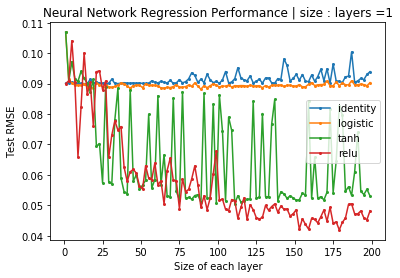

In [48]:
analyse_nn_regressor(1,200,2,X,Y,encode='oh')

Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name'],
      dtype='object')
activation function: identity
1
0.111666265941 0.111699674892
3
0.10804164672 0.108036190931
5
0.108778417173 0.108930195583
7
0.10888562073 0.108910871457
9
0.106593436033 0.106476339446
11
0.112618322305 0.112661805316
13
0.104357576906 0.104348264941
15
0.105436845858 0.105470751318
17
0.105690275438 0.105592484282
19
0.105237946439 0.1052117785
21
0.105699467549 0.105709286412
23
0.109156664533 0.109228197757
25
0.109366458558 0.109359646129
27
0.104632802303 0.104600908393
29
0.104698621655 0.104844183384
31
0.105589492661 0.105672218726
33
0.113852359878 0.113867973399
35
0.105949598775 0.106029040991
37
0.104222717028 0.104315875151
39
0.104663479735 0.104725578045
41
0.105624325835 0.105627503165
43
0.104816285139 0.104790823471
45
0.104336149295 0.104432505849
47
0.104366085347 0.104376960734
49
0.105422031098 0.10545282109
51
0.105348694866 0.105300965

0.0901085744678 0.0906409227814
69
0.0846252209056 0.0852216715098
71
0.0884527384313 0.0890214680871
73
0.0838427220468 0.0846742698518
75
0.0895278011936 0.0900811043786
77
0.0856460790119 0.0861893107884
79
0.0827089161253 0.083444871473
81
0.0846820952888 0.0853004341001
83
0.0844339626167 0.0850996377325
85
0.0847773079123 0.0853849716118
87
0.0840003341897 0.0845856934301
89
0.0890076070709 0.0897537832115
91
0.0844752642074 0.0850494615293
93
0.0827084833318 0.0834243612754
95
0.0837311571702 0.0844840778511
97
0.0826406750686 0.0831829252516
99
0.0881652705522 0.0887725395914
101
0.0827598908241 0.083294193081
103
0.0860371343942 0.0864560790198
105
0.0849838811615 0.0853336573504
107
0.0837449854751 0.084165545553
109
0.0853568788475 0.085882583153
111
0.0832037119073 0.0836308223885
113
0.0802826510719 0.080826837008
115
0.0816509638259 0.0825139595752
117
0.0841249347069 0.0845768477517
119
0.0818267363736 0.0823333933884
121
0.0859962311058 0.0864533053806
123
0.08406007149

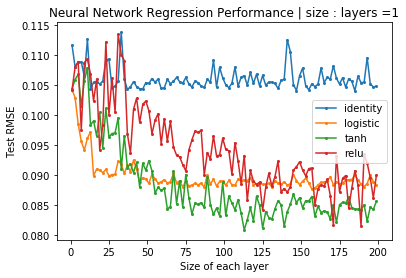

In [49]:
analyse_nn_regressor(1,200,2,X,Y,encode='sc')

In [50]:
#analyse_nn_regressor(2,100,2,X,Y, encode='oh')

In [51]:
#analyse_nn_regressor(3,50,2,X,Y, encode='oh')

## KNN

In [52]:
def analyze_knn(dataset,neighbor_range,remove_cols=[],encoding = 'oh'):
    removed_data = dataset.drop(remove_cols,axis=1)
    X_r,Y_r = getX_Y_from_dataset(removed_data)
    if(encoding=='oh'):
        X_r = one_hot_encode(X_r)
    else:
        X_r = scalar_encode(X_r)
        X_r = X_r.as_matrix()
    errors = []

    for neighbors in neighbor_range:
        print("Neighbors:",neighbors)
        knn_model = KNeighborsRegressor(n_neighbors = neighbors )
        tr,ts,m = perform_10fold(X_r,Y_r,knn_model)
        errors.append(ts)
        print(ts)
    plt.title('KNN Regression Performance excluding columns '+str(remove_cols))
    plt.xlabel('Neighbors')
    plt.ylabel('Test RMSE Error')
    plt.plot(neighbor_range,errors,marker='.',markersize=4)
    plt.show()
    
    

Index(['Day of Week', 'Work-Flow-ID', 'File Name'], dtype='object')
Neighbors: 2
0.0357605334397
Neighbors: 3
0.0467925828211
Neighbors: 4
0.0504298889372
Neighbors: 5
0.0499495657329
Neighbors: 6
0.0483517791785
Neighbors: 7
0.0461809949222
Neighbors: 8
0.0445268205641
Neighbors: 9
0.0439625414458
Neighbors: 10
0.0450730731195
Neighbors: 11
0.0470025281009
Neighbors: 12
0.0484764482602
Neighbors: 13
0.0497512412251
Neighbors: 14
0.0503881795271
Neighbors: 15
0.0506344419624
Neighbors: 16
0.0502729063895
Neighbors: 17
0.0503613642259
Neighbors: 18
0.0504843617477
Neighbors: 19
0.0505267296292
Neighbors: 20
0.0506221674475
Neighbors: 21
0.0508222620366
Neighbors: 22
0.0511682117582
Neighbors: 23
0.0516539685489
Neighbors: 24
0.052090014488
Neighbors: 25
0.0524723982844
Neighbors: 26
0.0526322064244
Neighbors: 27
0.0528618185674
Neighbors: 28
0.0530821600914
Neighbors: 29
0.0534533186741
Neighbors: 30
0.0540924599893
Neighbors: 31
0.0549065237505
Neighbors: 32
0.0558217586788
Neighbors: 

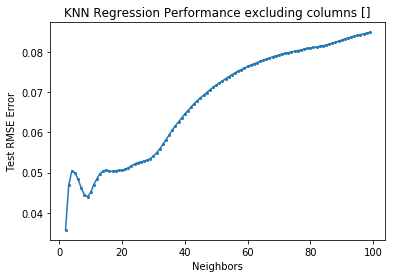

In [53]:
analyze_knn(dataset,neighbor_range=range(2,100,1))

Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name'],
      dtype='object')
Neighbors: 2
0.0442978082569
Neighbors: 3
0.0378119548193
Neighbors: 4
0.0339376360328
Neighbors: 5
0.0346301974196
Neighbors: 6
0.0393071426805
Neighbors: 7
0.0435068663419
Neighbors: 8
0.0453756877134
Neighbors: 9
0.0473472938976
Neighbors: 10
0.0487050861361
Neighbors: 11
0.0497123344852
Neighbors: 12
0.0506805961466
Neighbors: 13
0.0521150428609
Neighbors: 14
0.0538247105753
Neighbors: 15
0.0546617745853
Neighbors: 16
0.055134571233
Neighbors: 17
0.0552971850867
Neighbors: 18
0.0549098992125
Neighbors: 19
0.0549285709903
Neighbors: 20
0.0551135315772
Neighbors: 21
0.0558224990617
Neighbors: 22
0.0562574888821
Neighbors: 23
0.0567276080068
Neighbors: 24
0.0568304132919
Neighbors: 25
0.056958905722
Neighbors: 26
0.0567721333261
Neighbors: 27
0.0568066996799
Neighbors: 28
0.0567236707578
Neighbors: 29
0.0567646858703
Neighbors: 30
0.0570388932098
Neighbors: 31


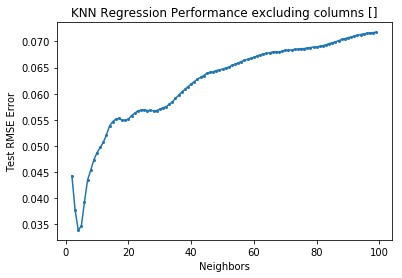

In [54]:
analyze_knn(dataset,range(2,100,1),encoding='sc')

Index(['Day of Week', 'Work-Flow-ID', 'File Name'], dtype='object')
Neighbors: 2
0.0913243218175
Neighbors: 3
0.087360453351
Neighbors: 4
0.0840205650842
Neighbors: 5
0.0816641223194
Neighbors: 6
0.0798136637622
Neighbors: 7
0.0783910527424
Neighbors: 8
0.0760624439052
Neighbors: 9
0.075034057675
Neighbors: 10
0.0744450985981
Neighbors: 11
0.0738778788356
Neighbors: 12
0.0734149620388
Neighbors: 13
0.0732910369576
Neighbors: 14
0.0729989955649
Neighbors: 15
0.0731195742225
Neighbors: 16
0.0733776185188
Neighbors: 17
0.0733172868878
Neighbors: 18
0.0736268312129
Neighbors: 19
0.0736149774895
Neighbors: 20
0.0736054502529
Neighbors: 21
0.0738082389741
Neighbors: 22
0.0741144092371
Neighbors: 23
0.0742615631351
Neighbors: 24
0.0740308131592
Neighbors: 25
0.0739928518582
Neighbors: 26
0.0735989189336
Neighbors: 27
0.0732094549644
Neighbors: 28
0.0731286230232
Neighbors: 29
0.0730567227301
Neighbors: 30
0.0728009103564
Neighbors: 31
0.0727669815434
Neighbors: 32
0.0729400083556
Neighbors: 3

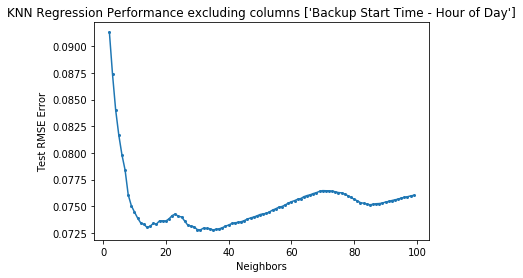

In [55]:
analyze_knn(dataset,range(2,100,1),['Backup Start Time - Hour of Day'])

Index(['Week #', 'Day of Week', 'Work-Flow-ID', 'File Name'], dtype='object')
Neighbors: 2
0.0933759910305
Neighbors: 3
0.087805788147
Neighbors: 4
0.084583981096
Neighbors: 5
0.0827893260941
Neighbors: 6
0.0817524390648
Neighbors: 7
0.0803303623014
Neighbors: 8
0.0786330936881
Neighbors: 9
0.0779767350928
Neighbors: 10
0.0771249195446
Neighbors: 11
0.0762688631219
Neighbors: 12
0.0756383801947
Neighbors: 13
0.0753206606141
Neighbors: 14
0.0748036161397
Neighbors: 15
0.0746173372803
Neighbors: 16
0.0744208178811
Neighbors: 17
0.0739927007814
Neighbors: 18
0.0737528218736
Neighbors: 19
0.0735467394263
Neighbors: 20
0.0733058765209
Neighbors: 21
0.0729643310379
Neighbors: 22
0.072845962344
Neighbors: 23
0.0727357689737
Neighbors: 24
0.0723813273467
Neighbors: 25
0.0723470105004
Neighbors: 26
0.0724260230565
Neighbors: 27
0.0723301325227
Neighbors: 28
0.0722346944063
Neighbors: 29
0.072265845619
Neighbors: 30
0.0723218480628
Neighbors: 31
0.0724204023865
Neighbors: 32
0.0723918386651
Neig

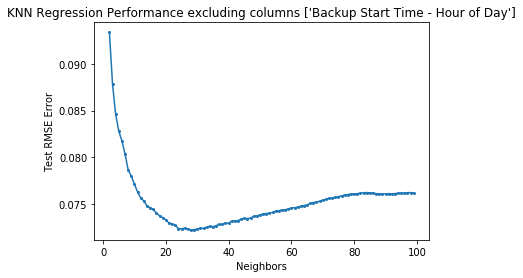

In [56]:
analyze_knn(dataset,range(2,100,1),['Backup Start Time - Hour of Day'],encoding='sc')

Index(['Day of Week', 'File Name'], dtype='object')
Neighbors: 2
0.0419077073088
Neighbors: 3
0.0596423846618
Neighbors: 4
0.0701682916998
Neighbors: 5
0.0766154270535
Neighbors: 6
0.0816281393922
Neighbors: 7
0.0854698665774
Neighbors: 8
0.0884567002878
Neighbors: 9
0.0906422463759
Neighbors: 10
0.0922953045535
Neighbors: 11
0.0936482733801
Neighbors: 12
0.094484122593
Neighbors: 13
0.0950961485831
Neighbors: 14
0.0954663920598
Neighbors: 15
0.0957036589577
Neighbors: 16
0.0959337512324
Neighbors: 17
0.0960674839917
Neighbors: 18
0.0961294372985
Neighbors: 19
0.0961389878048
Neighbors: 20
0.0960644090126
Neighbors: 21
0.09594395194
Neighbors: 22
0.0958180106725
Neighbors: 23
0.0956673313826
Neighbors: 24
0.0953878113564
Neighbors: 25
0.095008525592
Neighbors: 26
0.0945579905658
Neighbors: 27
0.0940983031867
Neighbors: 28
0.0936753382337
Neighbors: 29
0.093257415231
Neighbors: 30
0.092979909829
Neighbors: 31
0.0928226930722
Neighbors: 32
0.0927158955716
Neighbors: 33
0.0925801577209
Ne

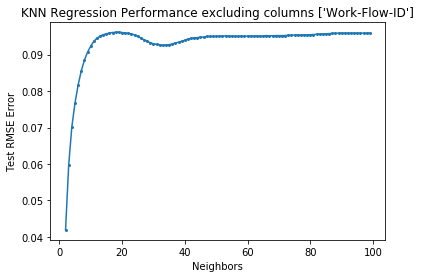

In [57]:
analyze_knn(dataset,range(2,100,1),['Work-Flow-ID'])

Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'File Name'],
      dtype='object')
Neighbors: 2
0.0507392122636
Neighbors: 3
0.0430696956382
Neighbors: 4
0.0395136138896
Neighbors: 5
0.0379950070575
Neighbors: 6
0.0407766045702
Neighbors: 7
0.044943301508
Neighbors: 8
0.0478062296577
Neighbors: 9
0.0500740876014
Neighbors: 10
0.0509723697277
Neighbors: 11
0.0513613564132
Neighbors: 12
0.0521655198369
Neighbors: 13
0.0536653169681
Neighbors: 14
0.0551034353726
Neighbors: 15
0.0562592612892
Neighbors: 16
0.0564798228522
Neighbors: 17
0.0566179724725
Neighbors: 18
0.0567477504753
Neighbors: 19
0.0566725847495
Neighbors: 20
0.0567624804331
Neighbors: 21
0.0572744680799
Neighbors: 22
0.0577495160127
Neighbors: 23
0.0583767901579
Neighbors: 24
0.0586572941982
Neighbors: 25
0.0588958410704
Neighbors: 26
0.0588949267385
Neighbors: 27
0.0591416558903
Neighbors: 28
0.0587014800208
Neighbors: 29
0.058823295392
Neighbors: 30
0.0589362616098
Neighbors: 31
0.0590360218705


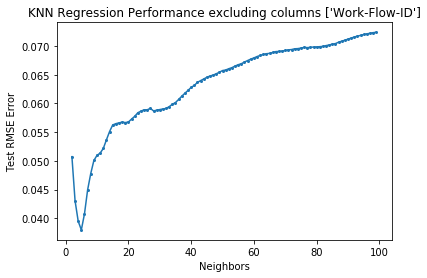

In [58]:
analyze_knn(dataset,range(2,100,1),['Work-Flow-ID'],'sc')

Index(['Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID',
       'File Name'],
      dtype='object')
Neighbors: 2
0.0155520616544
Neighbors: 3
0.0148444314136
Neighbors: 4
0.014411183386
Neighbors: 5
0.0140059219695
Neighbors: 6
0.0138049194079
Neighbors: 7
0.0135651870003
Neighbors: 8
0.0134611586896
Neighbors: 9
0.0133635073418
Neighbors: 10
0.0133202669685
Neighbors: 11
0.0134300104062
Neighbors: 12
0.0135069410331
Neighbors: 13
0.0140647154617
Neighbors: 14
0.0151734739563
Neighbors: 15
0.0169958996073
Neighbors: 16
0.0189720935171
Neighbors: 17
0.0210323785706
Neighbors: 18
0.0229602494442
Neighbors: 19
0.0239211683774
Neighbors: 20
0.025718977607
Neighbors: 21
0.0268953369957
Neighbors: 22
0.0282724621122
Neighbors: 23
0.0294333830432
Neighbors: 24
0.0308668515992
Neighbors: 25
0.0318801224499
Neighbors: 26
0.0325688835489
Neighbors: 27
0.0332119819703
Neighbors: 28
0.0335147791378
Neighbors: 29
0.0339784312001
Neighbors: 30
0.0346275291646
Neighbors: 31
0.03483430

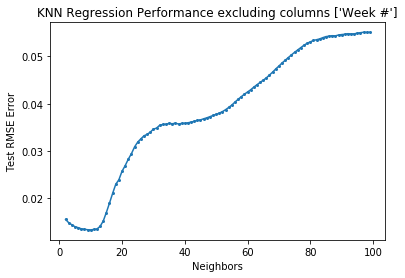

In [59]:
analyze_knn(dataset,range(2,100,1),['Week #'],'sc')

In [60]:
workflows = list(set(dataset['Work-Flow-ID'].values))
workflow_datasets=[dataset.loc[dataset['Work-Flow-ID'] == x] for x in  workflows]
workflow_datasets_xy = [getX_Y_from_dataset(d) for d in workflow_datasets] 
workflow_datasets_xy_oh = [(one_hot_encode(x[0]),x[1]) for x in workflow_datasets_xy]

Index(['Day of Week', 'Work-Flow-ID', 'File Name'], dtype='object')
Index(['Day of Week', 'Work-Flow-ID', 'File Name'], dtype='object')
Index(['Day of Week', 'Work-Flow-ID', 'File Name'], dtype='object')
Index(['Day of Week', 'Work-Flow-ID', 'File Name'], dtype='object')
Index(['Day of Week', 'Work-Flow-ID', 'File Name'], dtype='object')


### Part 2d

In [61]:
workflow_datasets_xy_oh = [(scalar_encode(x[0]),x[1]) for x in workflow_datasets_xy]

Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name'],
      dtype='object')
Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name'],
      dtype='object')
Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name'],
      dtype='object')
Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name'],
      dtype='object')
Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name'],
      dtype='object')


In [62]:
def plot_graph(x,y,xlabel,ylabel,title):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x, y, color='blue', lw=1, label=y,s=3)
    #plt.plot([y.min(), y.max()], [0,0], 'k--', lw=4)
    plt.show()

In [63]:
def plot_graph_time(y1,y2,y1label,y2label,ylabel,title):
    plt.title(title)
    plt.scatter(np.arange(y1.shape[0]), y1, color='blue', label=y1label,s=3)
    plt.scatter(np.arange(y1.shape[0]), y2, color='red', label=y2label,s=3)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')
    plt.show()

### 2d (i) (ii)

In [64]:
def analyse_lin_reg_separate(plots=False):
    i = 0
    for x in workflow_datasets_xy_oh:
        print(workflows[i])
        i+=1
        regressor = LinearRegression()
        avg_tr,avg_ts,bestModel = perform_10fold(x[0].as_matrix(),x[1],regressor)
        print("------------------------------")
        print("Average Training RMSE : ",avg_tr)
        print("Average Test RMSE : ",avg_ts)
        predicted = bestModel.predict(x[0])
        if(plots):
            plot_graph(x[1],predicted,"Actual","Fitted","Fitted vs Actual")
            plot_graph_time(x[1],predicted,"Actual","Fitted","Actual and Fitted values","Actual and Fitted values over time")
            plot_graph(predicted,x[1]-predicted,"Fitted","Residual","Residual vs Fitted")
            plot_graph_time(x[1]-predicted,predicted,"Residual","Fitted","Residual and Fitted values","Residual and Fitted values over time")


In [65]:
def analyse_poly_lin_reg_separate(plots=False,poly_degrees = []):
    i = 0
    test_rm = defaultdict(list)
    train_rm= defaultdict(list)
    best_deg_map = {}
    for x in workflow_datasets_xy_oh:
        print("****************************")
        print(workflows[i])        
        best_ts = 10000
        best_model = None
        best_deg = -1
        best_poly = None
        for deg in poly_degrees:
            regressor = LinearRegression()
            poly = PolynomialFeatures(deg)
            x_ = poly.fit_transform(x[0])
            avg_tr,avg_ts,bestModel = perform_10fold(x_,x[1],regressor)
            test_rm[workflows[i]].append(avg_ts)
            train_rm[workflows[i]].append(avg_ts)
            print("average Training RMSE : ",avg_tr)
            print("average Test RMSE : ",avg_ts)
            if(avg_ts<=best_ts):
                best_ts = avg_ts
                best_model = bestModel
                best_deg = deg
                best_poly = poly
                print('best so far',deg)
        x_tot = best_poly.transform(x[0])
        predicted = best_model.predict(x_tot)
        best_deg_map[workflows[i]]=best_deg
        if(plots):
            plot_graph(x[1],predicted,"Actual","Fitted",str(workflows[i])+" Fitted vs Actual")
            plot_graph_time(x[1],predicted,"Actual","Fitted","Actual and Fitted values",str(workflows[i])+" Actual and Fitted values over time")
            plot_graph(predicted,x[1]-predicted,"Fitted","Residual",str(workflows[i])+" Residual vs Fitted")
            plot_graph_time(x[1]-predicted,predicted,"Residual","Fitted","Residual and Fitted values",str(workflows[i])+" Residual and Fitted values over time")
        i+=1
    print(best_deg_map)
    for x in workflows:
        plt.plot(poly_degrees,test_rm[x], label = x, marker='.',markersize=4)
    plt.title('Avg Test RMSE Vs Polynomial Degree')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Test RMSE')
    plt.legend()
    plt.show()
    for x in workflows:
        print(train_rm[x])
        plt.plot(poly_degrees,train_rm[x], label = x, marker='.',markersize=4)
    plt.title('Avg Train RMSE Vs Polynomial Degree')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Train RMSE')
    plt.legend()
    plt.show()
    
        
        

****************************
work_flow_4
average Training RMSE :  0.0691825429143
average Test RMSE :  0.0695260630182
best so far 2
average Training RMSE :  0.0808390446901
average Test RMSE :  0.0802667082029
average Training RMSE :  0.0641511377474
average Test RMSE :  0.064660624033
best so far 4
average Training RMSE :  0.0454838021623
average Test RMSE :  0.0471896404788
best so far 5
average Training RMSE :  0.0394760534507
average Test RMSE :  0.0417764634492
best so far 6
average Training RMSE :  0.0331674028324
average Test RMSE :  0.0364936233043
best so far 7
average Training RMSE :  0.0233025411214
average Test RMSE :  0.0273240117392
best so far 8
average Training RMSE :  0.0213609444146
average Test RMSE :  0.0268253652924
best so far 9
average Training RMSE :  0.0158299906845
average Test RMSE :  0.0227173529437
best so far 10
average Training RMSE :  0.0137745928448
average Test RMSE :  0.0225453722715
best so far 11
average Training RMSE :  0.0134068044937
average Tes

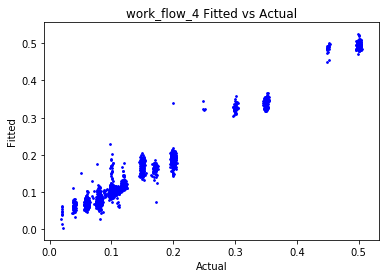

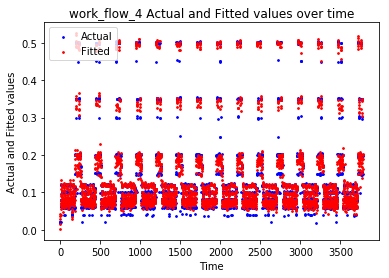

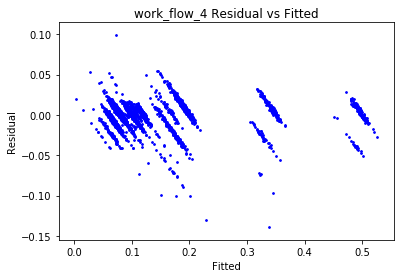

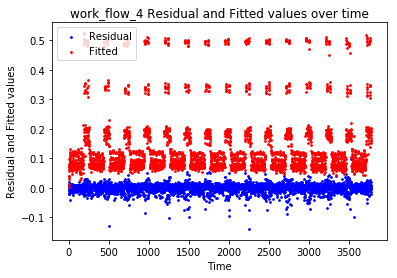

****************************
work_flow_0
average Training RMSE :  0.0295129662982
average Test RMSE :  0.0296520229399
best so far 2
average Training RMSE :  0.0262989516385
average Test RMSE :  0.0265731120118
best so far 3
average Training RMSE :  0.0249442578332
average Test RMSE :  0.0254470278002
best so far 4
average Training RMSE :  0.0181887776791
average Test RMSE :  0.0189129318934
best so far 5
average Training RMSE :  0.0103716306837
average Test RMSE :  0.0110336029672
best so far 6
average Training RMSE :  0.00908371310157
average Test RMSE :  0.0100655144844
best so far 7
average Training RMSE :  0.00821469494839
average Test RMSE :  0.00953418010128
best so far 8
average Training RMSE :  0.00776782377445
average Test RMSE :  0.00972789879899
average Training RMSE :  0.00733050541371
average Test RMSE :  0.0103038568383
average Training RMSE :  0.0139832878129
average Test RMSE :  0.0207982044112
average Training RMSE :  0.0138166450505
average Test RMSE :  0.02596324032

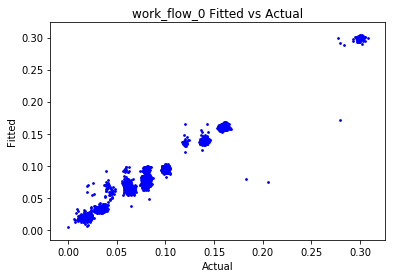

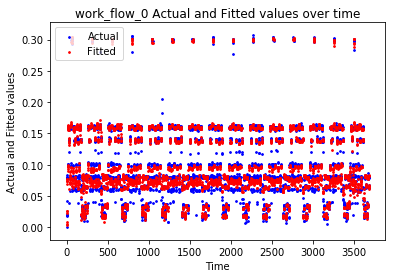

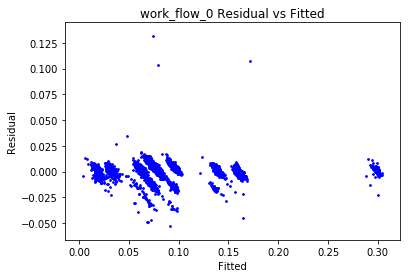

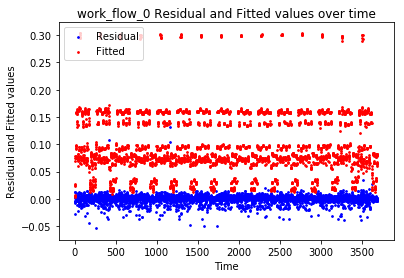

****************************
work_flow_3
average Training RMSE :  0.0063805525263
average Test RMSE :  0.0064059119084
best so far 2
average Training RMSE :  0.00602891385626
average Test RMSE :  0.00607384294141
best so far 3
average Training RMSE :  0.00557011054788
average Test RMSE :  0.00565395227037
best so far 4
average Training RMSE :  0.0049013375396
average Test RMSE :  0.00505142641261
best so far 5
average Training RMSE :  0.00459584968077
average Test RMSE :  0.00481040065323
best so far 6
average Training RMSE :  0.00454643049513
average Test RMSE :  0.00489503434057
average Training RMSE :  0.00424569412307
average Test RMSE :  0.00471741103357
best so far 8
average Training RMSE :  0.00416342637814
average Test RMSE :  0.00487025490137
average Training RMSE :  0.00444687471419
average Test RMSE :  0.00566957168923
average Training RMSE :  0.00389646366543
average Test RMSE :  0.00547495661162
average Training RMSE :  0.00371994409116
average Test RMSE :  0.0061496710630

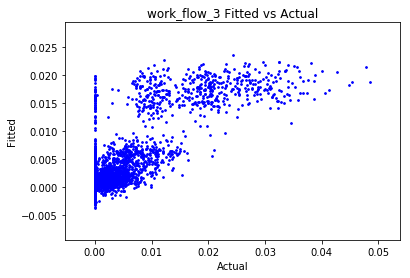

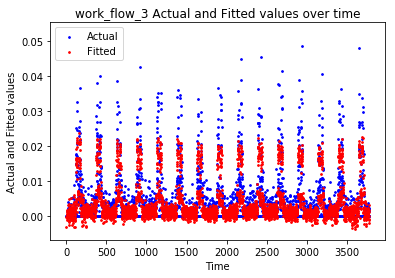

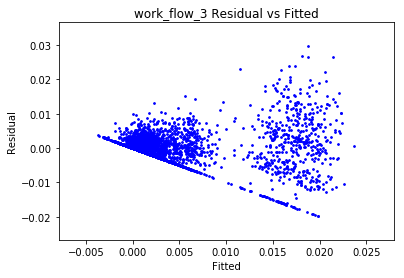

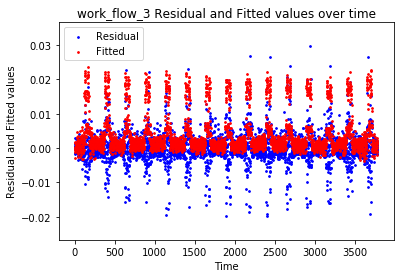

****************************
work_flow_2
average Training RMSE :  0.0384700364627
average Test RMSE :  0.0386059434153
best so far 2
average Training RMSE :  0.0347122423061
average Test RMSE :  0.035041193728
best so far 3
average Training RMSE :  0.0318760156071
average Test RMSE :  0.0324820168097
best so far 4
average Training RMSE :  0.0264165380053
average Test RMSE :  0.0273314794348
best so far 5
average Training RMSE :  0.0218518217912
average Test RMSE :  0.0230514676435
best so far 6
average Training RMSE :  0.0208140620749
average Test RMSE :  0.0226906178597
best so far 7
average Training RMSE :  0.0197064676645
average Test RMSE :  0.0223587117431
best so far 8
average Training RMSE :  0.0177728721019
average Test RMSE :  0.0215169394659
best so far 9
average Training RMSE :  0.0171879835235
average Test RMSE :  0.0228196129526
average Training RMSE :  0.0164448568039
average Test RMSE :  0.0244928971588


In [ ]:
analyse_poly_lin_reg_separate(True,poly_degrees=range(2,14))

work_flow_4
------------------------------
Average Training RMSE :  0.0859177525088
Average Test RMSE :  0.0860695536372


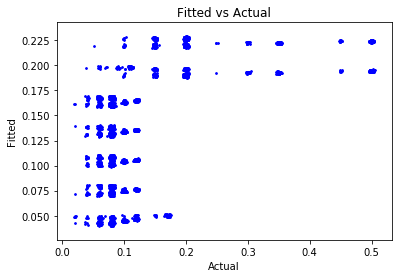

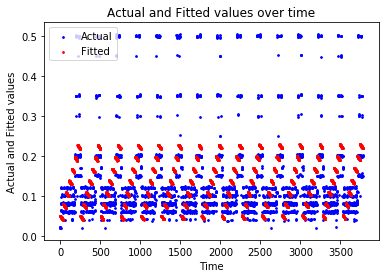

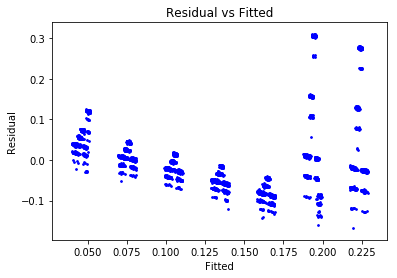

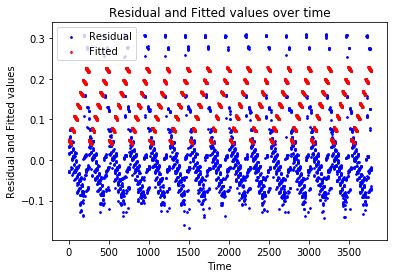

work_flow_0
------------------------------
Average Training RMSE :  0.0358362959992
Average Test RMSE :  0.0358714519778


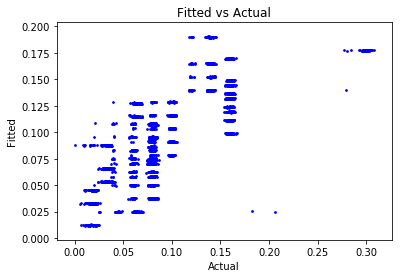

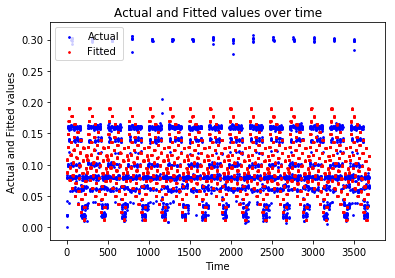

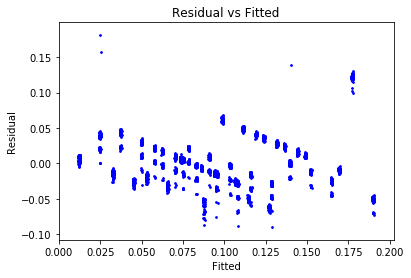

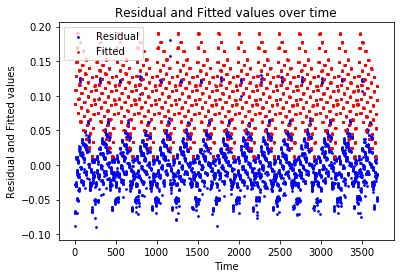

work_flow_3
------------------------------
Average Training RMSE :  0.00724432243424
Average Test RMSE :  0.00725154703729


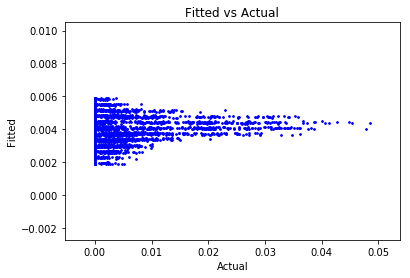

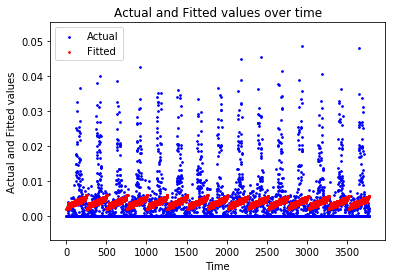

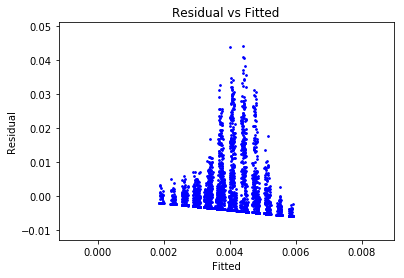

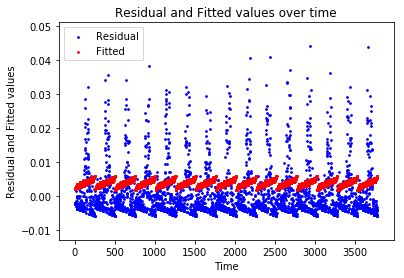

work_flow_2
------------------------------
Average Training RMSE :  0.0429136852757
Average Test RMSE :  0.0429719014196


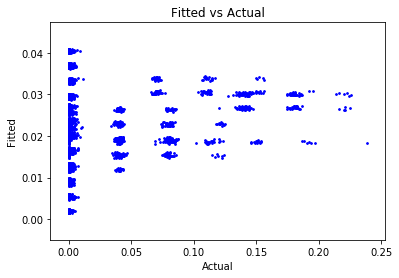

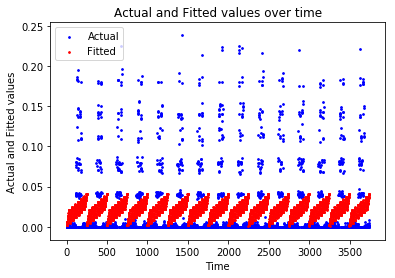

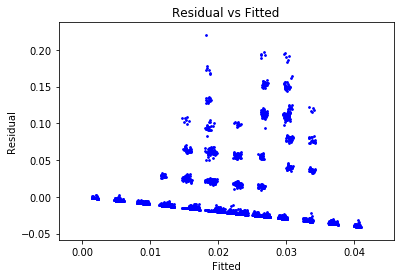

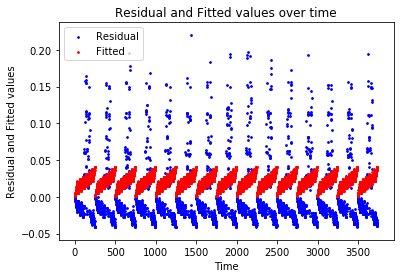

work_flow_1
------------------------------
Average Training RMSE :  0.148764159175
Average Test RMSE :  0.148949481489


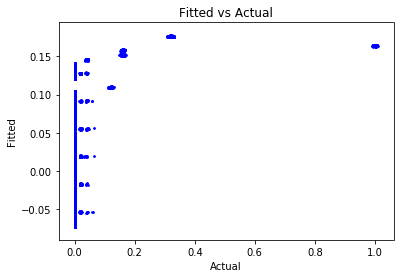

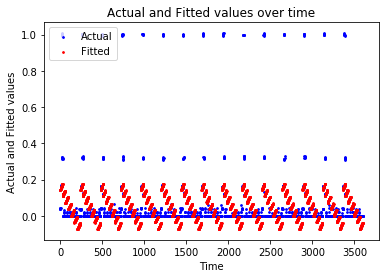

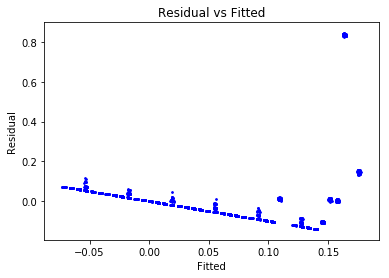

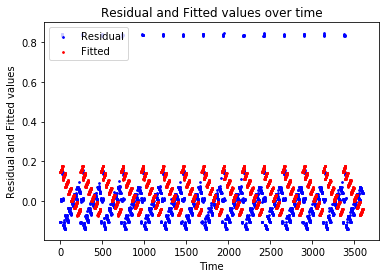

In [68]:
analyse_lin_reg_separate(True)